**1. IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**2. PREPEOCESSING** 

In [6]:
# Load dataset
df = pd.read_csv("C:/Users/sethi/Downloads/credit_card_defaults.csv", header=1)

# Display basic info and check for missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
# Remove 'ID' column as it's not useful
df.drop(columns=['ID'], inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Check if conversion was successful
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [10]:
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


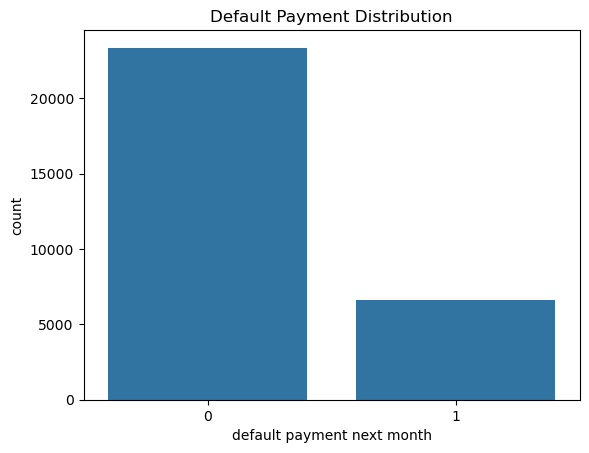

In [12]:
# Check class balance
sns.countplot(x='default payment next month', data=df)
plt.title("Default Payment Distribution")
plt.show()

**SMOTE Oversampling**

In [15]:
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df.drop(columns=['default payment next month'])  # Features
y = df['default payment next month']  # Target

smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1:1 balance
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class balance
print(y_resampled.value_counts())  # Now should be balanced


default payment next month
1    23364
0    23364
Name: count, dtype: int64


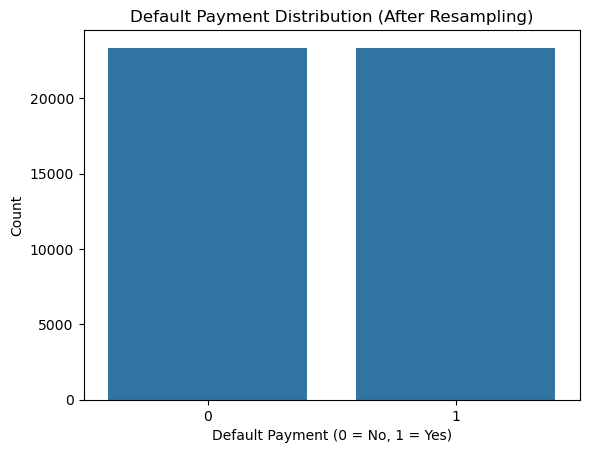

In [17]:
sns.countplot(x=y_resampled)
plt.title("Default Payment Distribution (After Resampling)")
plt.xlabel("Default Payment (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [19]:
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)

Shape of X_resampled: (46728, 23)
Shape of y_resampled: (46728,)


**3. MODELLING**

**Classification for oversampled balanced data**

In [23]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [25]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Logistic Regression Model
log_reg = LogisticRegression()
param_grid_log = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, param_grid_log, cv=5, scoring='accuracy')
log_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [29]:
# Best model evaluation
log_reg_best = log_reg_cv.best_estimator_
y_pred_log = log_reg_best.predict(X_test)
print("Logistic Regression Best Parameters:", log_reg_cv.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Best Parameters: {'C': 10}
Logistic Regression Accuracy: 0.7197731649903703
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4673
           1       0.72      0.72      0.72      4673

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346



In [ ]:
# SVM Model
svm_model = SVC(probability=True)
param_grid_svm = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_cv = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
svm_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [67]:
print("SVM Best Parameters:", svm_cv.best_params_)

SVM Best Parameters: {'C': 1, 'kernel': 'rbf'}


**Using the best parameters with Gaussian rbf kernel**

In [25]:
svm_best = SVC(C=10, kernel='rbf', probability=True)
svm_best.fit(X_train, y_train)

SVC(C=10, probability=True)

In [29]:
# Best SVM model evaluation
#svm_best = svm_cv.best_estimator_
y_pred_svm = svm_best.predict(X_test)
#print("SVM Best Parameters:", svm_cv.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.778086882088594
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4673
           1       0.79      0.76      0.77      4673

    accuracy                           0.78      9346
   macro avg       0.78      0.78      0.78      9346
weighted avg       0.78      0.78      0.78      9346



**Using the best parameters with linear kernel**

In [31]:
svm_best = SVC(C=10, kernel='linear', probability=True)
svm_best.fit(X_train, y_train)

SVC(C=10, kernel='linear', probability=True)

In [33]:
# Best SVM model evaluation
#svm_best = svm_cv.best_estimator_
y_pred_svm = svm_best.predict(X_test)
#print("SVM Best Parameters:", svm_cv.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7195591696982666
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      4673
           1       0.72      0.71      0.72      4673

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346



**VISUALISING DECISION BOUNDARY FOR BETTER PERFORMING RBF HYPERPARAMETER** 

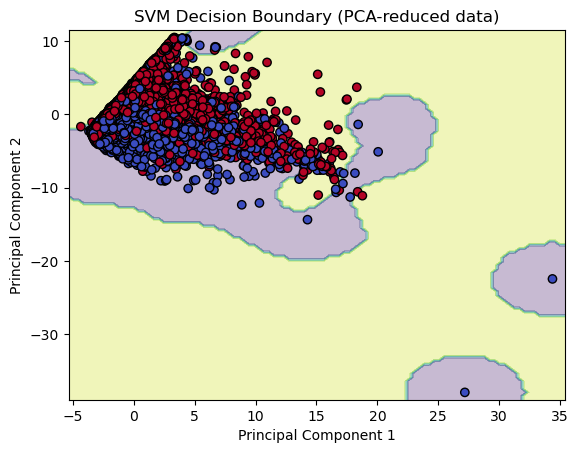

In [41]:
from sklearn.decomposition import PCA
# PCA for Decision Boundary Visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM on PCA-transformed data
svm_best = SVC(C=10, kernel='rbf', probability=True)
svm_best.fit(X_train_pca, y_train)

# Plot Decision Boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("SVM Decision Boundary (PCA-reduced data)")
    plt.show()

plot_decision_boundary(svm_best, X_train_pca, y_train)


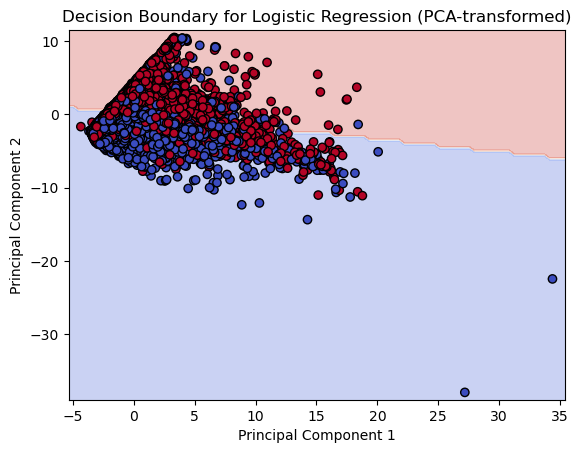

In [31]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Reduce the dataset to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)  # Assuming X_train is your training data

# Train Logistic Regression on the PCA-transformed data
log_reg = LogisticRegression(C=10)  # Use your best parameter C
log_reg.fit(X_pca, y_train)

# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on the grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary for Logistic Regression (PCA-transformed)')
plt.show()

**Model with data imbalance (no oversampling) for comparison**

In [43]:
# Split data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [45]:
# Standardize features
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [47]:
# Logistic Regression Model
log_reg = LogisticRegression()
param_grid_log = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_cv1 = GridSearchCV(log_reg, param_grid_log, cv=5, scoring='accuracy')
log_reg_cv1.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [51]:
# Best model evaluation
log_reg_best1 = log_reg_cv1.best_estimator_
y1_pred_log = log_reg_best1.predict(X1_test)
print("Logistic Regression Best Parameters:", log_reg_cv1.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y1_test, y1_pred_log))
print(classification_report(y1_test, y1_pred_log))

Logistic Regression Best Parameters: {'C': 1}
Logistic Regression Accuracy: 0.8083333333333333
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



In [53]:
# SVM Model
svm_model = SVC(probability=True)
param_grid_svm = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_cv = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
svm_cv.fit(X1_train, y1_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [57]:
# Best SVM model evaluation
svm_best1 = svm_cv.best_estimator_
y1_pred_svm = svm_best1.predict(X1_test)
print("SVM Best Parameters:", svm_cv.best_params_)
print("SVM Accuracy:", accuracy_score(y1_test, y1_pred_svm))
print(classification_report(y1_test, y1_pred_svm))

SVM Best Parameters: {'C': 1, 'kernel': 'rbf'}
SVM Accuracy: 0.814
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.66      0.33      0.44      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



**4. MODEL EVALUATION (BETTER PERFORMING - OVERSAMPLED DATA)**

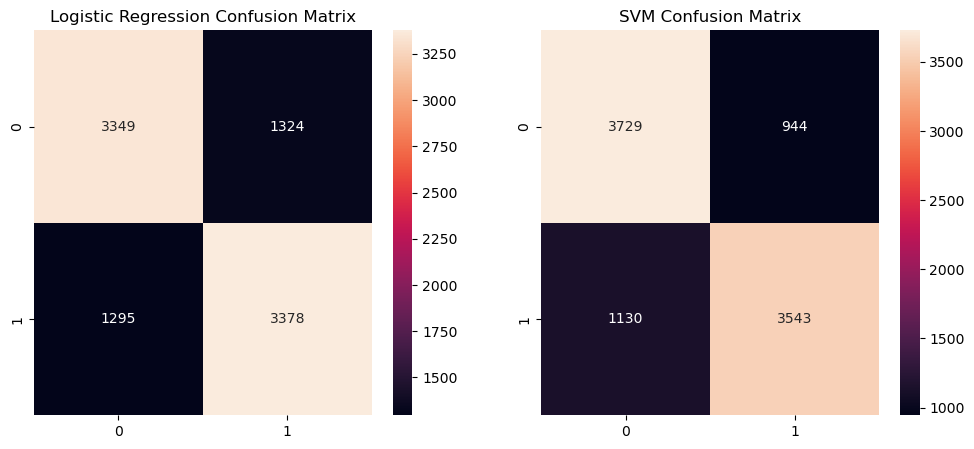

In [29]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
plt.show()

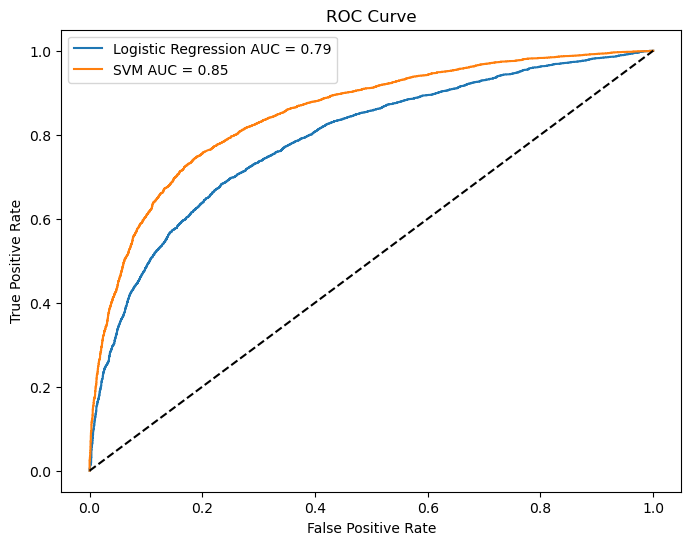

In [31]:
# ROC Curves
y_score_log = log_reg_best.predict_proba(X_test)[:, 1]
y_score_svm = svm_best.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression AUC = {auc(fpr_log, tpr_log):.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {auc(fpr_svm, tpr_svm):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()